In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('Marketingcampaigns.csv')
df

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0
5,6,30,0,Sydney,0,0,0,0,0
6,7,28,1,Sydney,0,0,3,1,1
7,8,19,1,Sydney,1,1,2,0,0
8,9,59,0,Perth,1,1,1,0,0
9,10,45,1,Auckland,0,0,0,0,0


In [4]:
df.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


In [5]:
df.tail()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
15,16,60,1,Sydney,1,0,0,0,0
16,17,53,1,Sydney,1,1,1,0,1
17,18,23,0,Perth,1,0,1,0,1
18,19,62,1,Perth,0,1,2,1,1
19,20,41,0,Brisbane,0,1,5,1,0


In [6]:
df.dropna(inplace= True)

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer id         20 non-null     int64 
 1   Age                 20 non-null     int64 
 2   Gender              20 non-null     int64 
 3   Location            20 non-null     object
 4   Email Opened        20 non-null     int64 
 5   Email Clicked       20 non-null     int64 
 6   Product page visit  20 non-null     int64 
 7   Discount offered    20 non-null     int64 
 8   Purchased           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [9]:
df.describe()

,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,38.250000,0.550000,0.500000,0.600000,2.10000,0.500000,0.500000
std,5.91608,15.382406,0.510418,0.512989,0.502625,1.68273,0.512989,0.512989
min,1.00000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.75000,24.500000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,10.50000,38.000000,1.000000,0.500000,1.000000,2.00000,0.500000,0.500000
75%,15.25000,53.500000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000
max,20.00000,62.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000


In [10]:
df['Purchased'].value_counts()

Purchased
1    10
0    10
Name: count, dtype: int64

In [11]:
df.shape

(20, 9)

In [12]:
df.isnull().sum()

Customer id           0
Age                   0
Gender                0
Location              0
Email Opened          0
Email Clicked         0
Product page visit    0
Discount offered      0
Purchased             0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Location']

0     2
1     0
2     3
3     1
4     1
5     3
6     3
7     3
8     2
9     0
10    0
11    2
12    2
13    2
14    2
15    3
16    3
17    2
18    2
19    1
Name: Location, dtype: int32

In [14]:
X = df.drop(columns = 'Purchased')
Y = df.Purchased

In [15]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, test_size=0.3, random_state=2)

In [16]:
svm = SVC(kernel='rbf', C=1, gamma= 0.15)

In [17]:
svm.fit(Xtrain,Ytrain)

SVC(C=1, gamma=0.15)

In [18]:
y_predict = svm.predict(Xtest)
y_predict

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, y_predict)

0.3333333333333333

# classify the category of Decision Boundary 

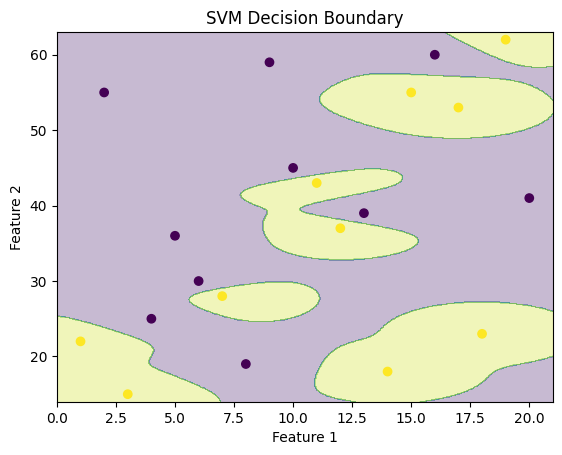

In [25]:
# Assuming df has 8 features and 'Purchased' is the target
X = np.array(df.drop(columns='Purchased'))  # Convert to numpy array
y = np.array(df['Purchased']) # Convert to numpy array

# Train the model using only 2 features
model = SVC(kernel='rbf', gamma= 0.15)
model.fit(X[:, :2], y)  # Use only the first 2 features for training

# Create a mesh grid over the 2D feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                    np.linspace(y_min, y_max, 500))

# Predict the class for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
# contourf is filled the complete graph , different category part is filled wirh different color or its make a decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
